
# <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > TABLE OF CONTENTS<br><div>  

* [1 - IMPORTING LIBRARIES](#1) 
    

* [2 - DATA COLLECTIONS & PREPARATION](#2)
    
    
* [3 - EXPLORATORY DATA ANALYSIS](#3) 
    
* [4 - DATA VISUALIZATION](#4)

* [5 - MODEL BUILDING.](#5)
    
    * [5.1 - LINEAR REGRESSION MODEL](#5.1)
    * [5.2 - SPLITTING THE DATA](#5.2)
    * [5.3 - FITTING THE DATA](#5.3)
    * [5.4 - PREDICTIONS](#5.4)
    * [5.5 - VISUALIZATIONS](#5.5)
        
    
* [6 - METRICS CALCULATION](#6)
    * [6.1 -  MSE : MEAN SQUARED ERROR](#6.1)
    * [6.2 - RMSE : ROOT MEAN SQUARED ERROR](#6.2)
    * [6.3 - MAE : MEAN ABSOLUTE ERROR](#6.3)
    * [6.4 - R2 SCORE](#6.4)
    
    
* [7 - NOTE](#7)

# <a id="1"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" > 1 -  Importing Libraries <br><div>  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import io 
import os

# Any results you write to the current directory are saved as output.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# <a id="2"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >2 - Data Collection & Preparation . <br><div>  

In [2]:
df = pd.read_csv("/kaggle/input/housing-dataset-of-5001-people-staying-in-usa/USA_Housing.csv")

#Reading the file in CSV format using read.csv('path of the file.') into a variable named df.

# <a id="3"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >3 - Exploratory Data Analysis. <br><div>  

In [3]:
df.head() 
# printing the first five columns of the dataset.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df.describe() #Generate descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.info() # to retrieve information about every column and their datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# <a id="4"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >4 - Data Visualization . <br><div>  

/tmp/ipykernel_20/834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

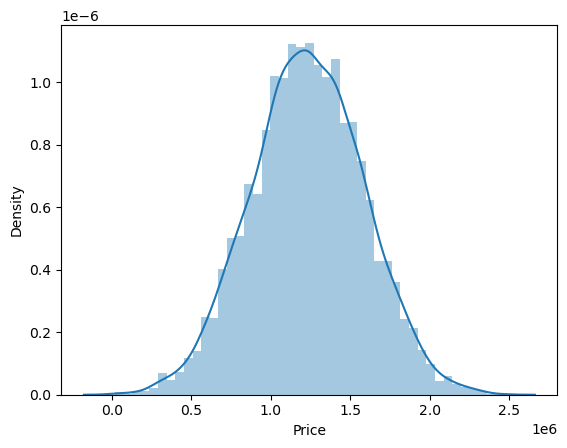

In [6]:
sns.distplot(df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

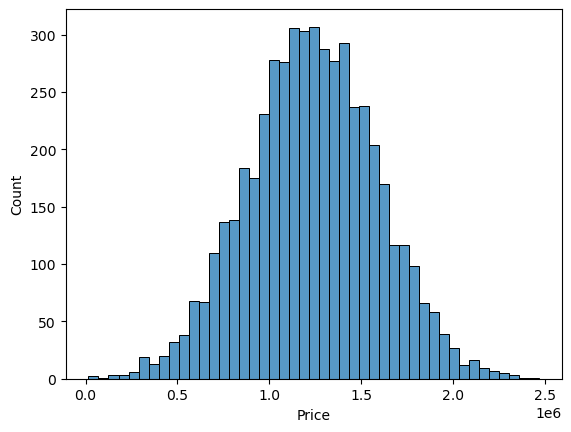

In [7]:
# Since Distplot is gonna be removed soon we may use Histogram plot as a alternative,

sns.histplot(x='Price',data = df)

/tmp/ipykernel_20/2321995514.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot = True , cmap = "BuPu" )


<Axes: >

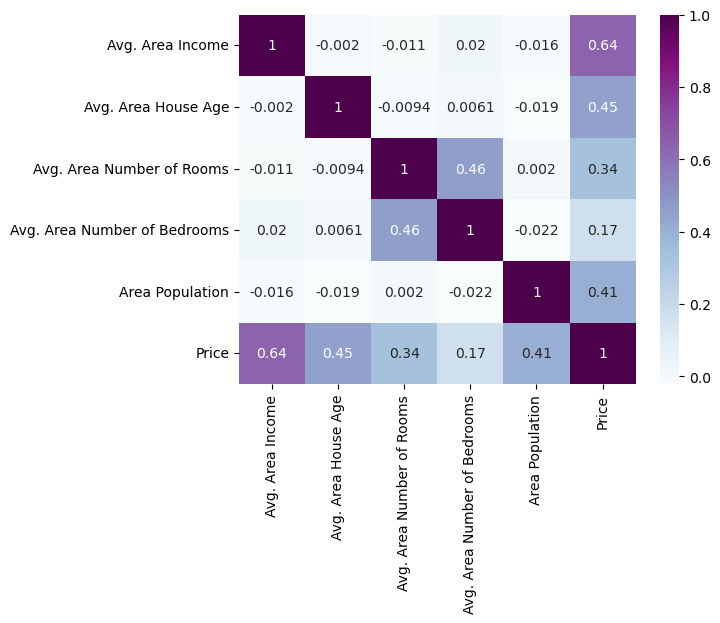

In [8]:
# Heatmap 

sns.heatmap(df.corr() , annot = True , cmap = "BuPu" )

# <a id="5"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >5 - Model Building. <br><div>  

# <a id="5.1"></a>
### <span style="color: #FF4500;"> 5.1 - Linear Regression Model

In [9]:
# Linear Regression Model.
x=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y=df['Price']




### <span style="color: #FF4500;">  Training and Testing Data : 


The train_test_split function is a utility function in the scikit-learn library that is used to split a dataset into training and testing sets. The function takes two arrays, x and y, representing the features and labels of the dataset, and returns four arrays: x_train, x_test, y_train, and y_test, representing the training and testing sets for both the features and labels.

The test_size parameter is used to specify the proportion of the dataset that should be used for testing. In the example code, test_size=0.4 means that 40% of the dataset will be used for testing, and the remaining 60% will be used for training.

The random_state parameter is used to set the random seed for the random number generator used by the function. This ensures that the same split is obtained every time the function is called with the same parameters. In the example code, random_state=101 means that the same split will be obtained every time the function is called with random_state=101.

The train_test_split function is commonly used in machine learning to split a dataset into training and testing sets for model training and evaluation. By splitting the dataset into training and testing sets, we can train the model on the training set and evaluate its performance on the testing set. This helps to prevent overfitting and provides a more accurate estimate of the model's performance on new, unseen data.

# <a id="5.2"></a>
### <span style="color: #FF4500;"> 5.2 - Train and Test split of Data . 

In [10]:
# Dividing the dataset into training and testing Dataset.
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.4 , random_state = 101)

# <a id="5.3"></a>
### <span style="color: #FF4500;"> 5.3 - Fitting the data.

In [11]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression() 
lm.fit(x_train,y_train)
print(lm.intercept_) #Intercept is the point where the Regression will cross the Y-axis.

-2640159.7968526958


In [12]:
cdf=pd.DataFrame(lm.coef_,x.columns,columns=['Coeff']) 
cdf
#In linear regression, coefficients are the values that multiply the predictor values. 
#Suppose you have the following regression equation: y = 3X + 5. In this equation, +3 is the coefficient, X is the predictor, and +5 is the constant.

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# <a id="5.4"></a>
### <span style="color: #FF4500;"> 5.4 - Predictions . 

In [13]:
# checking the predictions 
predictions = lm.predict(x_test)
print(predictions)

[1260960.70567627  827588.75560329 1742421.24254344 ...  372191.40626917
 1365217.15140898 1914519.5417888 ]


# <a id="5.5"></a>
### <span style="color: #FF4500;"> 5.5 - Visualizing the output .

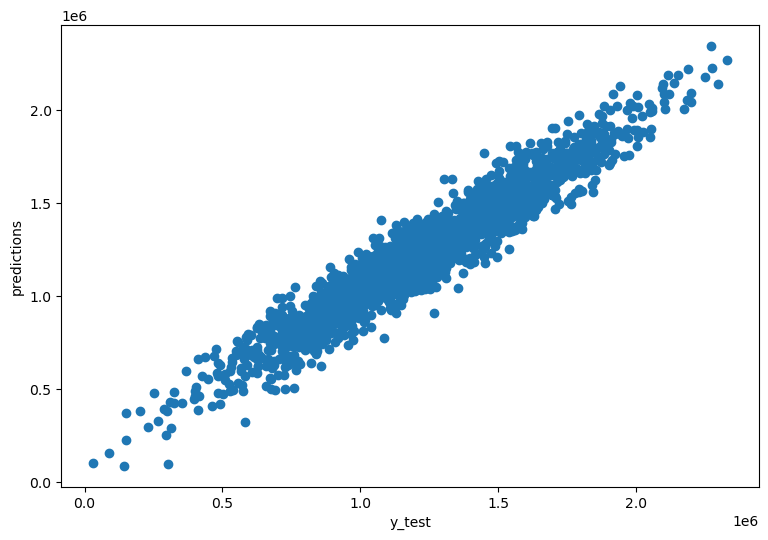

In [14]:
plt.figure(figsize=(9,6))
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")


plt.show()

# here we check or validate our predictions to determine the error rate using the testing data.

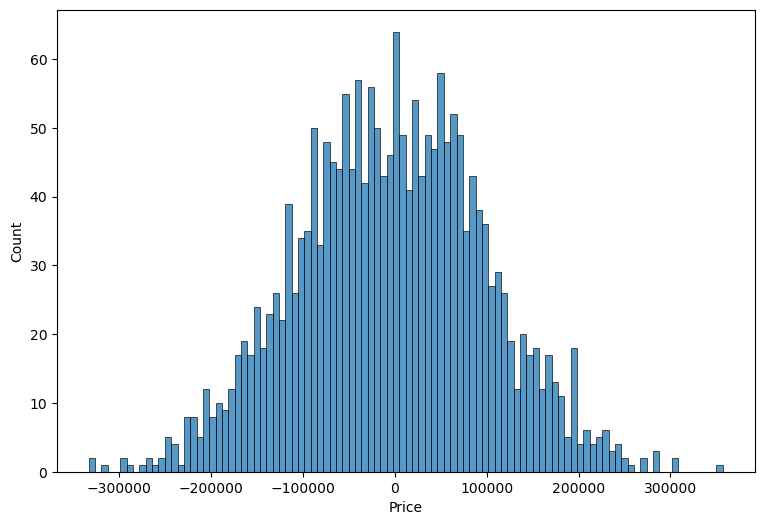

In [15]:
# Creating a Histogram.

plt.figure(figsize=(9,6))
sns.histplot((y_test-predictions),bins= 100)
plt.show()

# <a id="6"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: #FF4500; border-bottom: 8px solid WHITE" >6 - Calcluating the Metrics. <br><div>  

In [16]:
# Calculating the RMSE , MAE and MSE values...

from sklearn import metrics

# <a id="6.1"></a>
### <span style="color: #FF4500;"> 6.1 - Mean Squared Error (MSE) :

In [17]:
# Calculating the Mean Squared error...

mean_square_error = metrics.mean_squared_error(y_test , predictions )
print('MSE (Mean Square error) : ',mean_square_error)

MSE (Mean Square error) :  10460958907.208977


# <a id="6.2"></a>
### <span style="color: #FF4500;"> 6.2 - Root Mean Squared Error (RMSE) :

In [18]:
# Calculating the Root mean squared error...

root_mean_square_error = np.sqrt(mean_square_error)
print('RMSE (Root Mean Squared Error) :', root_mean_square_error)

RMSE (Root Mean Squared Error) : 102278.82922290897


# <a id="6.3"></a>
### <span style="color: #FF4500;"> 6.3 - Mean Absolute Error (MAE) :

In [19]:
# Calculating the Mean Absolute Error...

Mean_absolute_error = metrics.mean_absolute_error(y_test,predictions)
print( "MAE (Mean Absolute Error) : " , Mean_absolute_error)

MAE (Mean Absolute Error) :  82288.22251914942


# <a id="6.4"></a>
### <span style="color: #FF4500;"> 6.4 - R-Squared Statistics (r2-score) :

In [20]:
from sklearn.metrics import r2_score

r2_score_value = r2_score(y_test, predictions)
print("R2 Score: ", r2_score_value)


R2 Score:  0.9176824009649241


# <a id="7"></a>
### <div style= "font-family: Times New Roman; font-weight:bold; letter-spacing: 0px; color:WHITE; font-size:120%; text-align:left;padding:3.0px; background: BROWN; border-bottom: 8px solid WHITE" > 7 - NOTE:<br><div>  

# <span style="color: BROWN;"> Thank you guys for your time . I hope the metrics and fitting of a data was indeed helpful for a lot of people out there and do upvote as it will help to reach the work more and spread on a wide reach helping me on my Grandmaster journey . I really appreciate the fact that you completed the notebook from start to end , I will appreciate your comments , reviews ,  upvotes on the same . 

![Alt Text](https://cdn.dribbble.com/users/448124/screenshots/2177658/qq-.gif)